In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/Bitcamp-Finra


In [0]:
%cd Bitcamp-Finra

[Errno 2] No such file or directory: 'Bitcamp-Finra'
/content/drive/Bitcamp-Finra


In [0]:
pwd = %pwd

In [0]:
import pandas as pd
import keras
import os
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [0]:
df = pd.read_pickle(pwd+"/"+'df527.pkl')

In [0]:
df.head()

,Date,Name,Other_Bus,Used_Alias,Job_hops,Fraud_Occured,Current_Firm,Current_Firm_Add
1000016,2019-04-10,KEVIN CIEPLICKI,0,1,5,0,MORGAN STANLEY,2000 WESTCHESTER AVENUE PURCHASE NY
1000018,2019-04-10,DOUGLAS BATES,1,1,1,0,"CLEARWATER ADVISORS, LLC",101 S. CAPITOL BLVD SUITE 1201BOISE ID
1000034,2019-04-10,STEPHEN BRYARS,1,0,5,1,"MML INVESTORS SERVICES, LLC",1295 STATE STREET SPRINGFIELD MA
1000059,2019-04-10,DOUGLAS GAINES,0,0,1,0,"STIFEL, NICOLAUS & COMPANY, INCORPORATED",501 N BROADWAY ST LOUIS MO
1000066,2019-04-10,DOUGLAS HALLETT,1,1,4,0,SPC,300 PARKLAND PLAZA ANN ARBOR MI


In [0]:
df.describe(include='all')

,Date,Name,Other_Bus,Used_Alias,Job_hops,Fraud_Occured,Current_Firm,Current_Firm_Add
count,353742,353742,353742.000000,353742.000000,353742.000000,353742.000000,353742,353742
unique,1,311997,NaN,NaN,NaN,NaN,22904,18811
top,2019-04-10,MICHAEL SMITH,NaN,NaN,NaN,NaN,"MERRILL LYNCH, PIERCE, FENNER & SMITH INCORPOR...",ONE BRYANT PARK NEW YORK NY
freq,353742,63,NaN,NaN,NaN,NaN,27209,27209
mean,NaN,NaN,0.539365,0.567272,4.301417,0.192615,NaN,NaN
std,NaN,NaN,0.498449,0.495454,3.011035,0.394354,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,2.000000,0.000000,NaN,NaN
50%,NaN,NaN,1.000000,1.000000,3.000000,0.000000,NaN,NaN
75%,NaN,NaN,1.000000,1.000000,6.000000,0.000000,NaN,NaN


In [0]:
features = ['Used_Alias', 'Job_hops', 'Current_Firm', 'Other_Bus']

In [0]:
df_train = df[features]
df_labels = df[['Fraud_Occured']]

In [0]:
df_train.head()

,Used_Alias,Job_hops,Current_Firm,Other_Bus
1000016,1,5,MORGAN STANLEY,0
1000018,1,1,"CLEARWATER ADVISORS, LLC",1
1000034,0,5,"MML INVESTORS SERVICES, LLC",1
1000059,0,1,"STIFEL, NICOLAUS & COMPANY, INCORPORATED",0
1000066,1,4,SPC,1


In [0]:
df_labels.head()

,Fraud_Occured
1000016,0
1000018,0
1000034,1
1000059,0
1000066,0


In [0]:
(df.groupby('Current_Firm')['Fraud_Occured'].sum()).idxmax(), max(df.groupby('Current_Firm')['Fraud_Occured'].sum())

('MERRILL LYNCH, PIERCE, FENNER & SMITH INCORPORATED', 5143)

In [0]:
df_labels['Fraud_Occured'].value_counts()

0    285606
1     68136
Name: Fraud_Occured, dtype: int64

In [0]:
data = df_train.to_numpy()
labels = df_labels.to_numpy()

In [0]:
label_encoder = LabelEncoder()
data[:,2] = label_encoder.fit_transform(data[:,2])

In [0]:
data[:,1]

array([5, 1, 5, ..., 1, 3, 3], dtype=object)

In [0]:
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
k = 330000
training_data = features_standardized[:k]
training_labels = labels[:k]
val_data = features_standardized[k:]
val_labels = labels[k:]

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='ADAM')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32)                128       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
__________

In [0]:
callbacks_list = [
        keras.callbacks.ReduceLROnPlateau(
            monitor='loss',
            factor=0.1,
            patience=5,
        ),
        keras.callbacks.ModelCheckpoint(
            filepath=pwd+"/" +"Finra.h5",
            monitor='loss',
            save_best_only=True,
        ),
]

In [0]:
epochs = 50
history = model.fit(training_data, training_labels, batch_size=2028, epochs=epochs, verbose =1,\
          callbacks = callbacks_list, validation_data = (val_data,val_labels) )

Train on 330000 samples, validate on 23742 samples
Epoch 1/50
330000/330000 [==============================] - 6s 17us/step - loss: 0.5842 - val_loss: 0.4543
Epoch 2/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4947 - val_loss: 0.4541
Epoch 3/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4908 - val_loss: 0.4476
Epoch 4/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4891 - val_loss: 0.4500
Epoch 5/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4880 - val_loss: 0.4483
Epoch 6/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4879 - val_loss: 0.4469
Epoch 7/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4873 - val_loss: 0.4478
Epoch 8/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4869 - val_loss: 0.4505
Epoch 9/50
330000/330000 [==============================] - 3s 10us/step - loss: 0.4865 - val

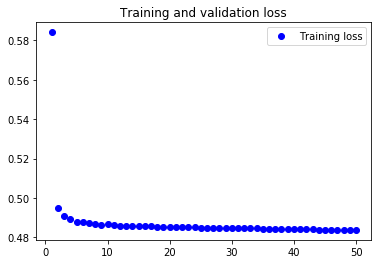

In [0]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()